Componente Principal 1: 0.7296
Componente Principal 2: 0.9581
Componente Principal 3: 0.9948
Componente Principal 4: 1.0000


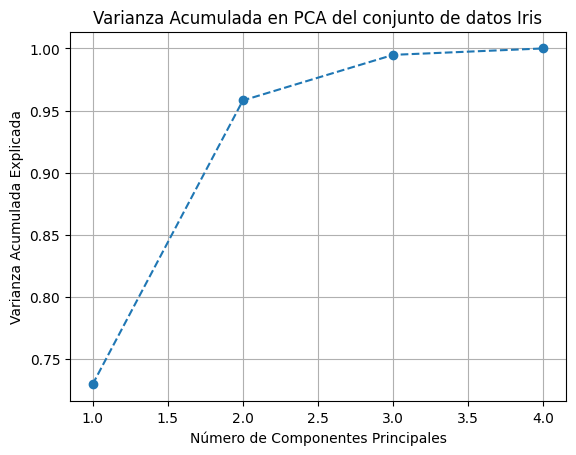

In [5]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

# Cargar el conjunto de datos Iris
iris = load_iris()
X = iris.data

# Estandarizar los datos (recomendado para PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Calcular la matriz de covarianza
cov_matrix = np.cov(X_scaled, rowvar=False)

# Calcular los valores propios (eigenvalues) y vectores propios (eigenvectors)
eigenvalues, _ = np.linalg.eig(cov_matrix)

# Ordenar los valores propios en orden descendente
eigenvalues_sorted = np.sort(eigenvalues)[::-1]

# Calcular la varianza acumulada
total_variance = np.sum(eigenvalues_sorted)
variance_explained = np.cumsum(eigenvalues_sorted) / total_variance

# Imprimir la varianza acumulada para cada número de componentes principales
for i, explained_variance in enumerate(variance_explained):
    print(f"Componente Principal {i+1}: {explained_variance:.4f}")

# Visualizar la varianza acumulada en un gráfico
import matplotlib.pyplot as plt

plt.plot(range(1, len(variance_explained) + 1), variance_explained, marker='o', linestyle='--')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Acumulada Explicada')
plt.title('Varianza Acumulada en PCA del conjunto de datos Iris')
plt.grid(True)
plt.show()

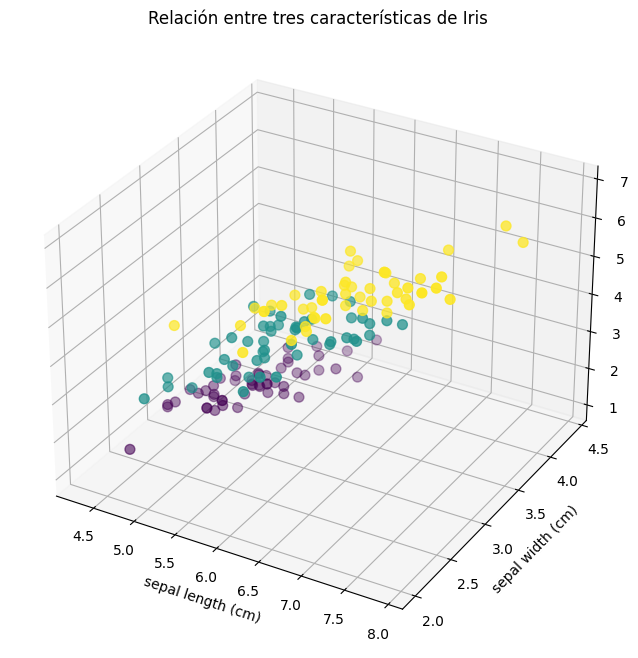

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import load_iris

# Cargar el conjunto de datos Iris
iris = load_iris()
X = iris.data
feature_names = iris.feature_names

# Indices de las características que se utilizarán en el gráfico 3D
feature1_index = feature_names.index("sepal length (cm)")
feature2_index = feature_names.index("sepal width (cm)")
feature3_index = feature_names.index("petal length (cm)")

# Crear una figura 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Graficar los datos en 3D
ax.scatter(X[:, feature1_index], X[:, feature2_index], X[:, feature3_index], c=iris.target, cmap='viridis', s=50)
ax.set_xlabel(feature_names[feature1_index])
ax.set_ylabel(feature_names[feature2_index])
ax.set_zlabel(feature_names[feature3_index])
ax.set_title('Relación entre tres características de Iris')

plt.show()

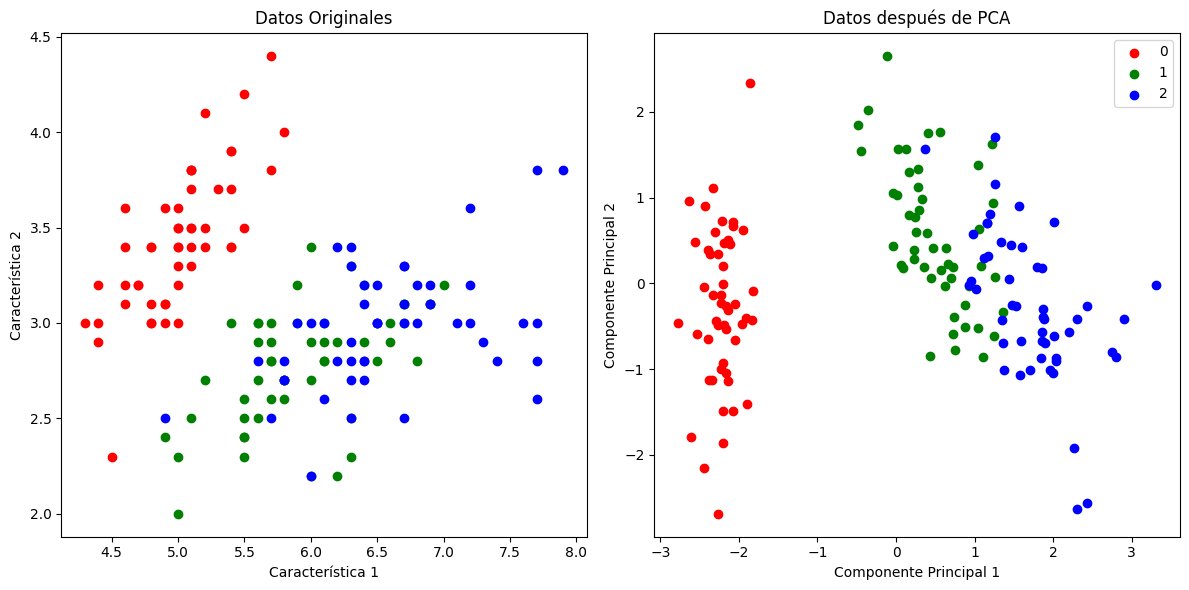

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

# Cargar el conjunto de datos Iris
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names

# Estandarizar los datos (opcional pero recomendado para PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Visualizar los datos originales en un gráfico de dispersión en 2D
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
for target, color in zip(np.unique(y), ['r', 'g', 'b']):
    indices_to_keep = y == target
    plt.scatter(X[indices_to_keep, 0], X[indices_to_keep, 1], c=color, label=target)
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.title('Datos Originales')

# Aplicar PCA
cov_matrix = np.cov(X_scaled, rowvar=False)
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]
num_components = 2
top_eigenvectors = eigenvectors[:, :num_components]
X_pca = X_scaled.dot(top_eigenvectors)

# Visualizar los datos después de aplicar PCA en un gráfico de dispersión en 2D
plt.subplot(1, 2, 2)
for target, color in zip(np.unique(y), ['r', 'g', 'b']):
    indices_to_keep = y == target
    plt.scatter(X_pca[indices_to_keep, 0], X_pca[indices_to_keep, 1], c=color, label=target)
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Datos después de PCA')

plt.legend()
plt.tight_layout()
plt.show()

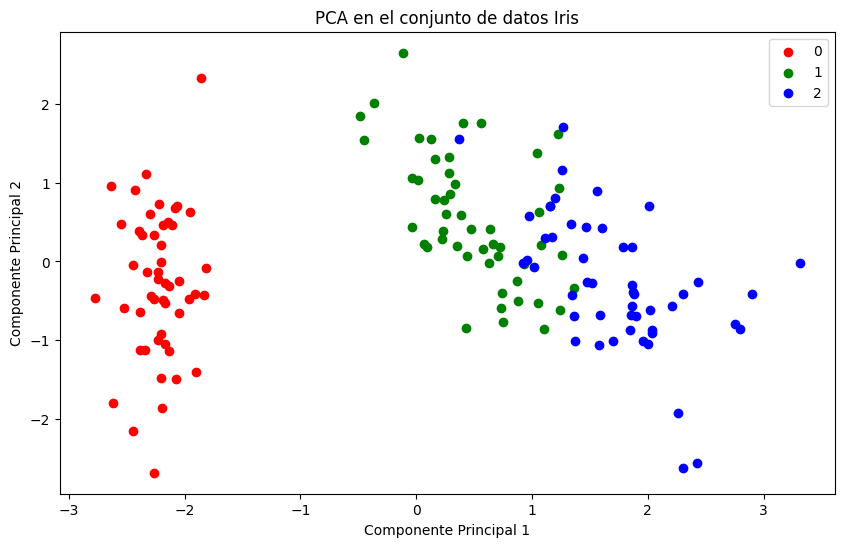

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

# Cargar el conjunto de datos Iris
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names

# Estandarizar los datos (opcional pero recomendado para PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Calcular la matriz de covarianza
cov_matrix = np.cov(X_scaled, rowvar=False)

# Calcular los valores propios y vectores propios
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Ordenar los valores propios y vectores propios en orden descendente
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

# Seleccionar el número de componentes principales
num_components = 2  # Cambia esto según cuántos componentes desees

# Tomar los primeros 'num_components' vectores propios
top_eigenvectors = eigenvectors[:, :num_components]

# Proyectar los datos originales en el nuevo espacio de características
X_pca = X_scaled.dot(top_eigenvectors)

# Crear un DataFrame para los componentes principales
pca_df = pd.DataFrame(data=X_pca, columns=['Componente Principal 1', 'Componente Principal 2'])

# Agregar la columna de etiquetas
pca_df['Target'] = y

# Visualizar los resultados
plt.figure(figsize=(10, 6))
targets = np.unique(y)
colors = ['r', 'g', 'b']
for target, color in zip(targets, colors):
    indices_to_keep = pca_df['Target'] == target
    plt.scatter(pca_df.loc[indices_to_keep, 'Componente Principal 1'],
                pca_df.loc[indices_to_keep, 'Componente Principal 2'],
                c=color, label=target)
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(targets)
plt.title('PCA en el conjunto de datos Iris')
plt.show()

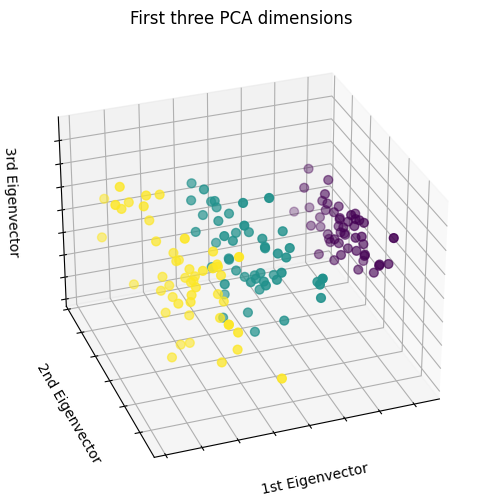

In [3]:
# unused but required import for doing 3d projections with matplotlib < 3.2
import mpl_toolkits.mplot3d  # noqa: F401

from sklearn.decomposition import PCA

fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d", elev=-150, azim=110)

X_reduced = PCA(n_components=3).fit_transform(iris.data)
ax.scatter(
    X_reduced[:, 0],
    X_reduced[:, 1],
    X_reduced[:, 2],
    c=iris.target,
    s=40,
)

ax.set_title("First three PCA dimensions")
ax.set_xlabel("1st Eigenvector")
ax.xaxis.set_ticklabels([])
ax.set_ylabel("2nd Eigenvector")
ax.yaxis.set_ticklabels([])
ax.set_zlabel("3rd Eigenvector")
ax.zaxis.set_ticklabels([])

plt.show()